HARRYKABODHA_BMEN4480_HW2

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import umap.umap_ as umap
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns




2024-04-16 11:20:16.197850: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.10.0rc2.dev29+gc68557c5 anndata==0.11.0.dev95+g55a1725 umap==0.5.5 numpy==1.26.0 scipy==1.11.3 pandas==2.1.1 scikit-learn==1.3.1 statsmodels==0.14.0 igraph==0.10.8 louvain==0.8.1 pynndescent==0.5.11


In [28]:
# Load the data
adata = sc.read_csv("/Users/hike/Library/CloudStorage/GoogleDrive-hek2128@columbia.edu/My Drive/Spring 2024/Statistical Machine for Genomics/pbmc_6Kcells_500genes.txt",delimiter="\t")

# Set the dataset name
adata.uns["name"] = "PBMC 6k"


In [29]:
# Q1a, Normalize
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)


normalizing counts per cell
    finished (0:00:00)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:196: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


In [30]:
# Q1a, Identify high variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)


extracting highly variable genes


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [31]:
# Q1a
# Print the highly variable genes
highly_variable_genes = adata.var[adata.var['highly_variable']].index.tolist()
print("Highly Variable Genes:")
print(highly_variable_genes)


Highly Variable Genes:
['6', '7', '12', '15', '16', '25', '26', '31', '37', '40', '45', '46', '52', '55', '56', '68', '69', '78', '82', '83', '84', '87', '91', '93', '95', '101', '112', '113', '114', '115', '116', '117', '123', '133', '136', '138', '145', '156', '157', '169', '171', '172', '173', '181', '182', '187', '188', '191', '194', '200', '202', '208', '210', '213', '220', '221', '223', '236', '240', '243', '247', '248', '254', '262', '269', '271', '273', '289', '291', '300', '304', '306', '307', '314', '349', '352', '356', '365', '366', '367', '368', '372', '374', '376', '381', '396', '406', '414', '417', '421', '426', '427', '437', '447', '449', '460', '471', '473', '480', '481', '486', '491', '500', '504', '506', '509', '520', '523', '528', '539', '552', '565', '568', '579', '584', '589', '594', '597', '600', '622', '625', '634', '636', '648', '653', '657', '660', '669', '670', '677', '679', '680', '690', '692', '699', '700', '702', '705', '719', '725', '726', '727', '740', '7

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)


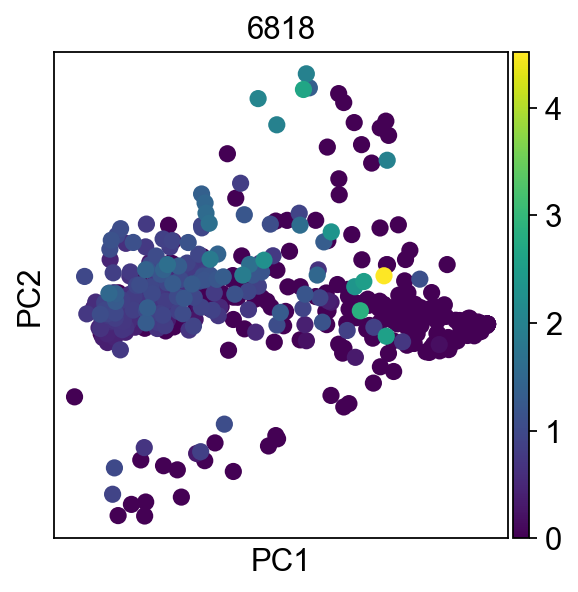

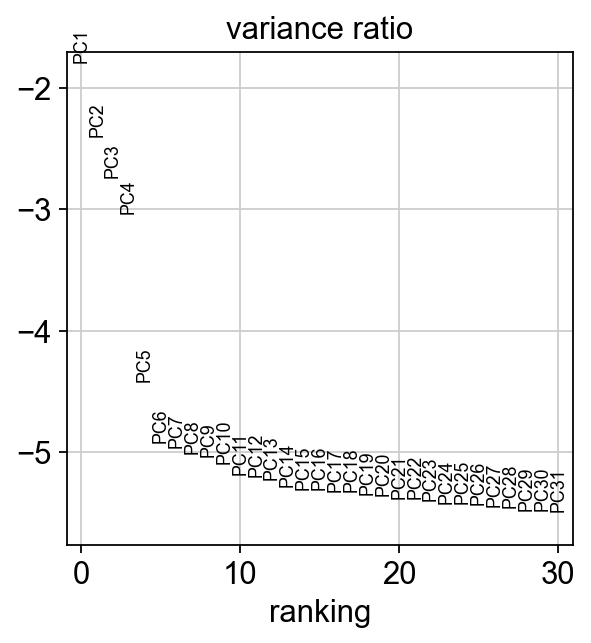

In [32]:
# Q1a, PCA
sc.tl.pca(adata, svd_solver='arpack')

#visualization
sc.pl.pca(adata, color='6818')
sc.pl.pca_variance_ratio(adata, log=True)


Q1b, Base on the plot it shows that 2 principal components are required to explain 90% of the variance in the dataset. Suggesting that 20 components might include a lot of dimensions that don't add much explanatiory power and could introduce noise. 

In [33]:
# Q2, Compute the neigborhood graph
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


In [34]:
# Q2, Embedding the neighborhood graph
sc.tl.leiden(adata)
sc.tl.paga(adata)
sc.pl.paga(adata, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata, init_pos='paga')

running Leiden clustering
    finished: found 11 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


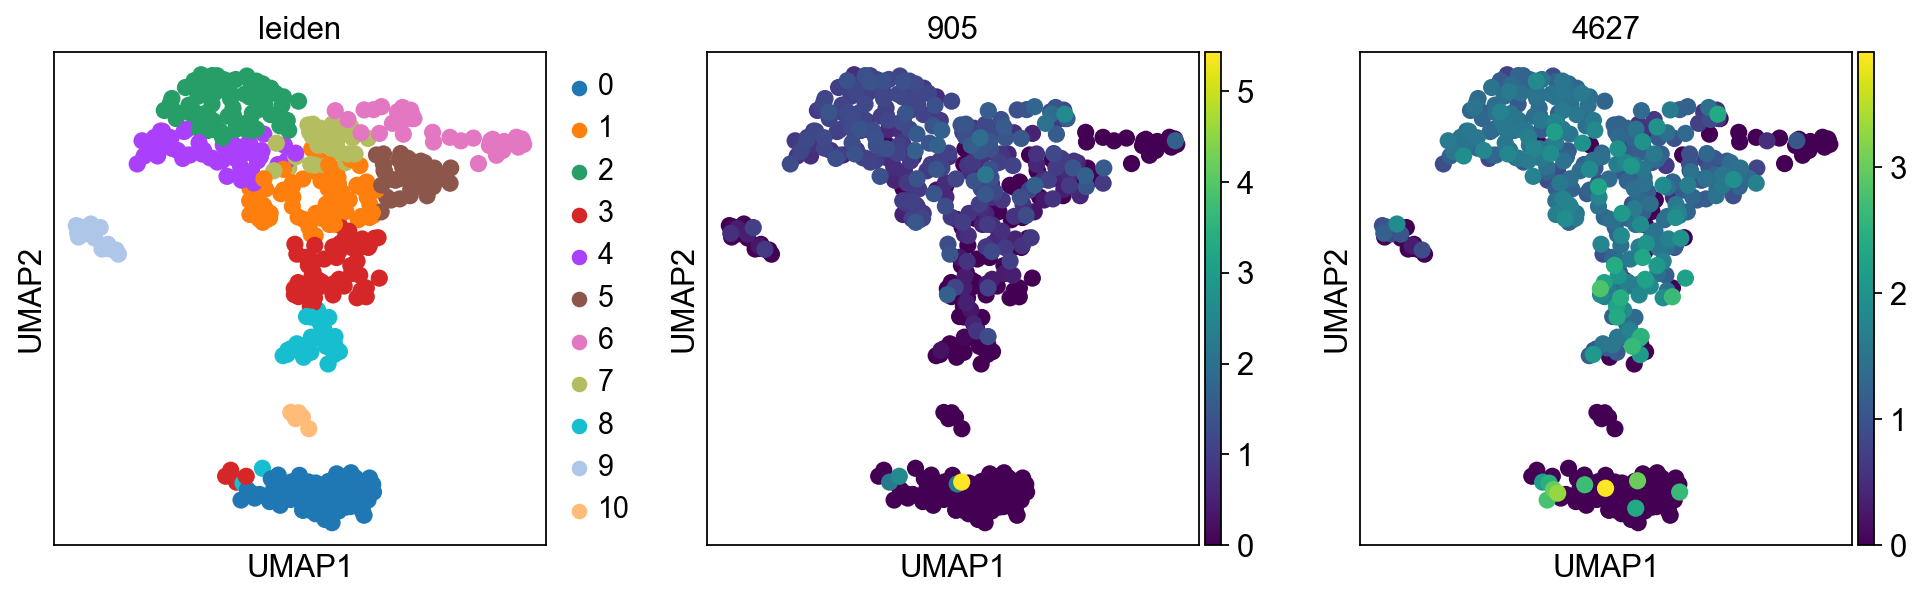

In [35]:
# Q2, UMAP in 2D
sc.pl.umap(adata, color=['leiden', '905', '4627'])

Q2, Based on the Elbow method I justified my choice of K

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


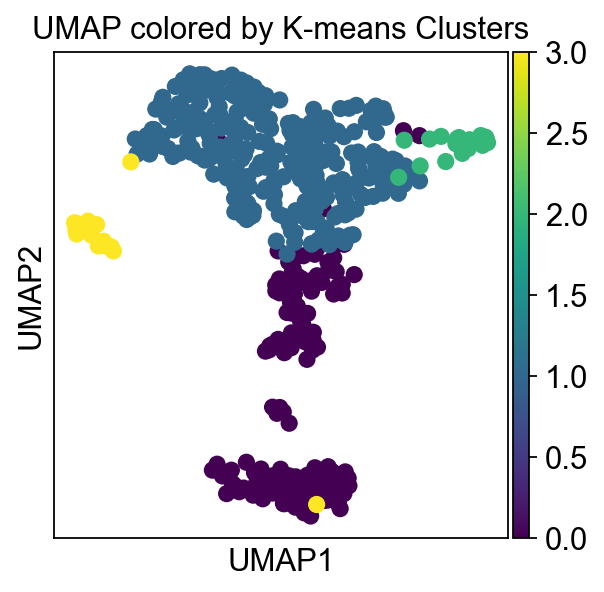

In [36]:
#Q2, K-clusters
K = 4 

# Perform K-means clustering on the PCA representation
kmeans = KMeans(n_clusters=K, random_state=42)
adata.obs['kmeans_clusters'] = kmeans.fit_predict(adata.obsm['X_pca'])

# Color the embedding (UMAP or t-SNE) with the K-means cluster IDs
sc.pl.umap(adata, color='kmeans_clusters', title='UMAP colored by K-means Clusters')


computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


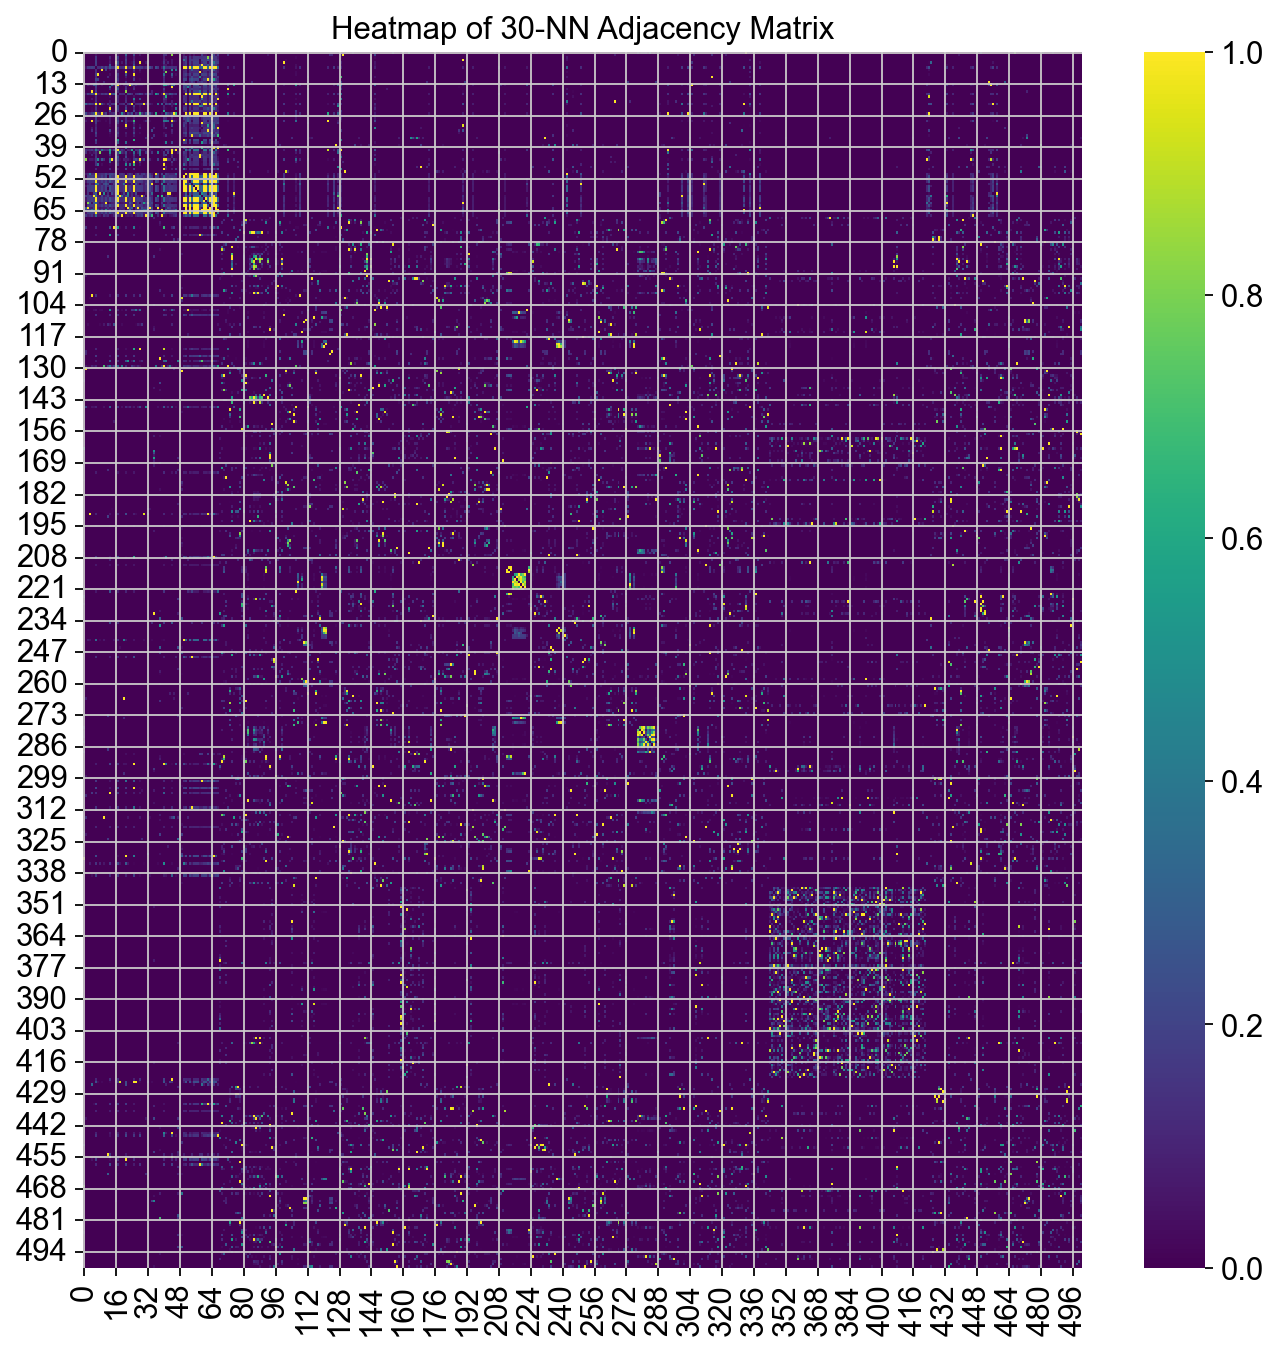

In [37]:
# Q3, Heatmap
sc.pp.neighbors(adata, n_neighbors=30, metric='euclidean')

# Access the adjacency matrix
adj_matrix = adata.obsp['connectivities']

# Plot the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(adj_matrix.toarray(), cmap='viridis')
plt.title('Heatmap of 30-NN Adjacency Matrix')
plt.show()


Q3, The Euclidean distance - after PCA data is transformed into a set of linearly uncorrelated variables following a gaussian distribution. This distance metric measures the straightline distance between points in this new space hence why.

In [38]:
# Q4, Cluster cells using a graph-based algorithm such as Louvain with the kNN graph
sc.tl.louvain(adata)


running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 6 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


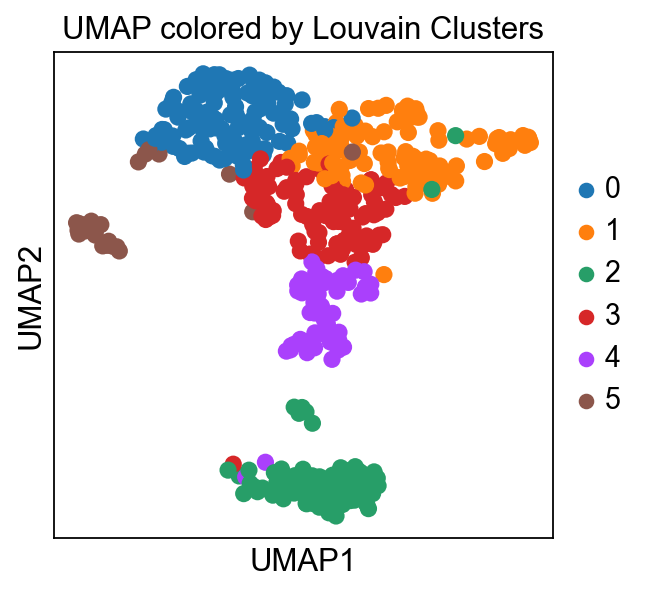

In [39]:
# Q4, UMAP
sc.pl.umap(adata, color='louvain', title='UMAP colored by Louvain Clusters')


Q4, The louvain cluster appears to follow the data's shape and distribution more closely potentially leading to a more nuanced seperationof cell types whereas the K-means may impose a more rigid structure.

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


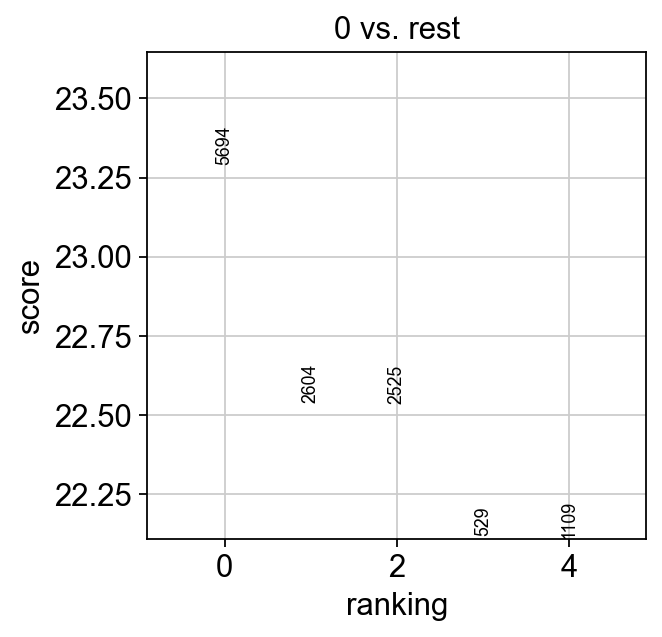

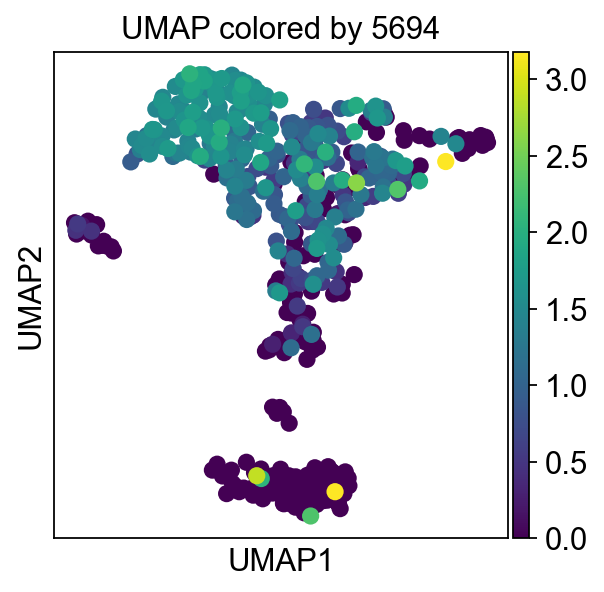

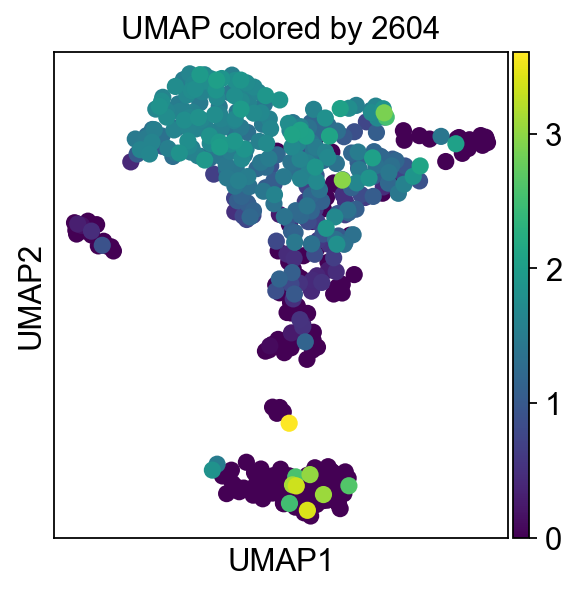

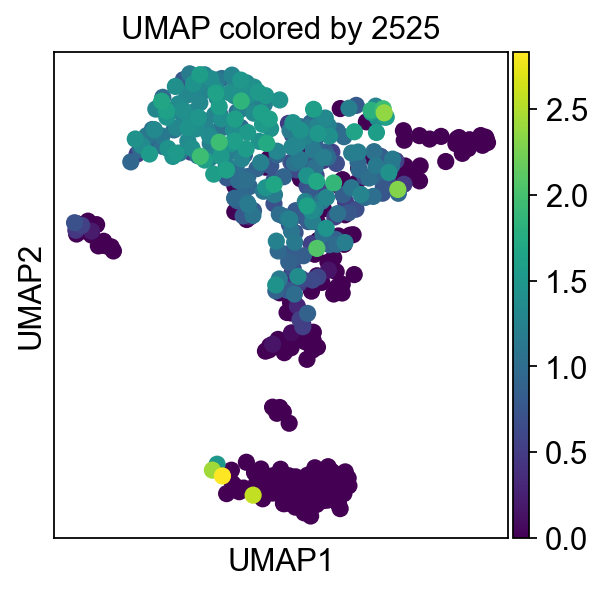

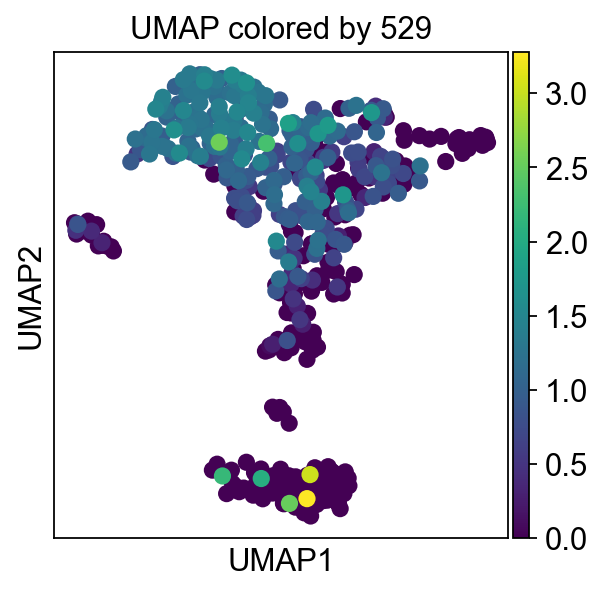

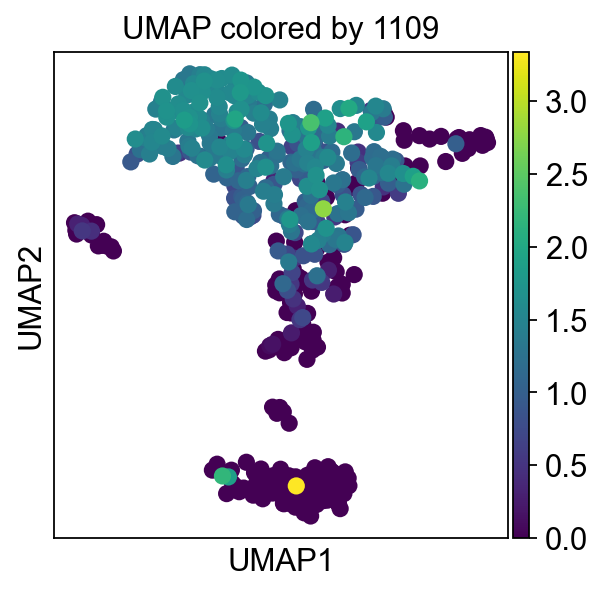

In [40]:
# Q5, Differential expression analysis
sc.tl.rank_genes_groups(adata, groupby='louvain', method='t-test', n_genes=5)

# Plot the top 5 DEGs for a cluster '2'
sc.pl.rank_genes_groups(adata, n_genes=5, sharey=False, groups=['0'])

#Color the embedding with the expression of the top 5 DEGs
top5_genes = adata.uns['rank_genes_groups']['names']['0'][:5]
for gene in top5_genes:
    sc.pl.umap(adata, color=gene, title=f'UMAP colored by {gene}')


Q5b, Clustering typically involves looking at different expressions of genes within that cluster compared to others.

It would inlcude;
1. Checking the known fucntions of DEGs
2. Comparing gene expression patterns to known signatures of cell types of states

Q5c, Other differntial expression methods inlcude;
1. bayesian approaches
2. Wilcoxon Rank-sum test - a non parametric test that doesn't assume normal distribution of data
3. Negative binomial regression - Often used in RNA seq data to model count data that follow over dispersed distributions.